In [1]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Binary Logistic regression

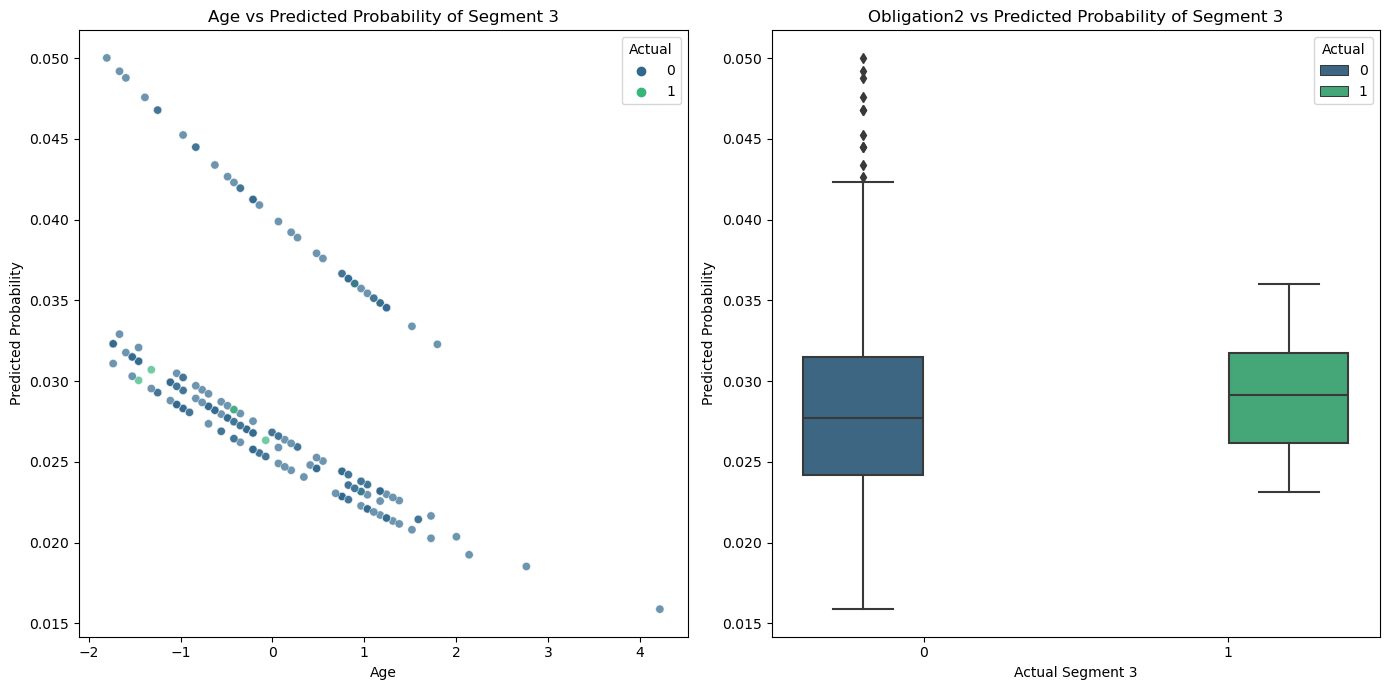

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
vacmotdesc = pd.read_csv('vacmotdescriptor_variables.csv')

# Define features and target
X = vacmotdesc[['Age', 'Obligation2']]
y = vacmotdesc['Vacation.Behaviour']

# Convert target to binary (TRUE/FALSE for segment 3)
y_binary = (y == 3).astype(int)

# Drop rows with missing values
X = X.dropna()
y_binary = y_binary.loc[X.index]  # Align y_binary with X

# Ensure y_binary is int
y_binary = y_binary.astype(int)

# Define preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age']),
        ('cat', OneHotEncoder(), ['Obligation2'])
    ])

# Create pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Transform the test features for visualization
X_test_transformed = preprocessor.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=['Age', 'Obligation_Q1', 'Obligation_Q2', 'Obligation_Q3', 'Obligation_Q4'])

# Add predicted probabilities to the DataFrame
X_test_transformed_df['Probability'] = y_pred_proba
X_test_transformed_df['Actual'] = y_test.values

# Plotting
plt.figure(figsize=(14, 7))

# Plot for Age vs Probability
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_test_transformed_df, x='Age', y='Probability', hue='Actual', palette='viridis', marker='o', alpha=0.7)
plt.title('Age vs Predicted Probability of Segment 3')
plt.xlabel('Age')
plt.ylabel('Predicted Probability')

# Plot for Obligation2 vs Probability
plt.subplot(1, 2, 2)
sns.boxplot(data=X_test_transformed_df, x='Actual', y='Probability', hue='Actual', palette='viridis')
plt.title('Obligation2 vs Predicted Probability of Segment 3')
plt.xlabel('Actual Segment 3')
plt.ylabel('Predicted Probability')

plt.tight_layout()
plt.show()


Optimization terminated successfully.
         Current function value: 1.779556
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                     C6   No. Observations:                 1000
Model:                        MNLogit   Df Residuals:                      975
Method:                           MLE   Df Model:                           20
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                0.004416
Time:                        03:43:38   Log-Likelihood:                -1779.6
converged:                       True   LL-Null:                       -1787.5
Covariance Type:            nonrobust   LLR p-value:                    0.7297
      C6=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1286      0.411     -0.313      0.754      -0.934       0.677
Age           -0.0011      0.

<Figure size 1200x600 with 0 Axes>

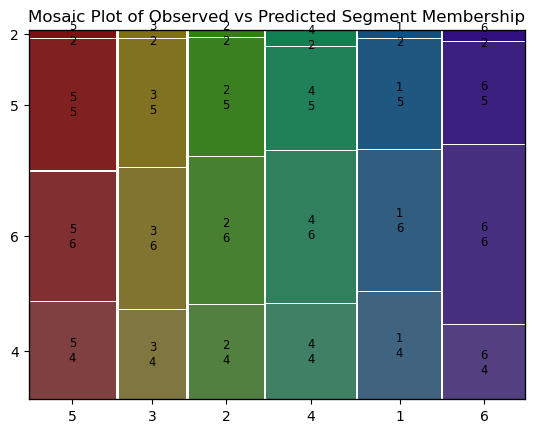

Number of data points assigned to segment 6: 168
       Segment_1  Segment_2  Segment_3  Segment_4  Segment_5  Segment_6  \
count        0.0        0.0        0.0        0.0        0.0        0.0   
mean         NaN        NaN        NaN        NaN        NaN        NaN   
std          NaN        NaN        NaN        NaN        NaN        NaN   
min          NaN        NaN        NaN        NaN        NaN        NaN   
25%          NaN        NaN        NaN        NaN        NaN        NaN   
50%          NaN        NaN        NaN        NaN        NaN        NaN   
75%          NaN        NaN        NaN        NaN        NaN        NaN   
max          NaN        NaN        NaN        NaN        NaN        NaN   

       Observed  
count     168.0  
mean        6.0  
std         0.0  
min         6.0  
25%         6.0  
50%         6.0  
75%         6.0  
max         6.0  


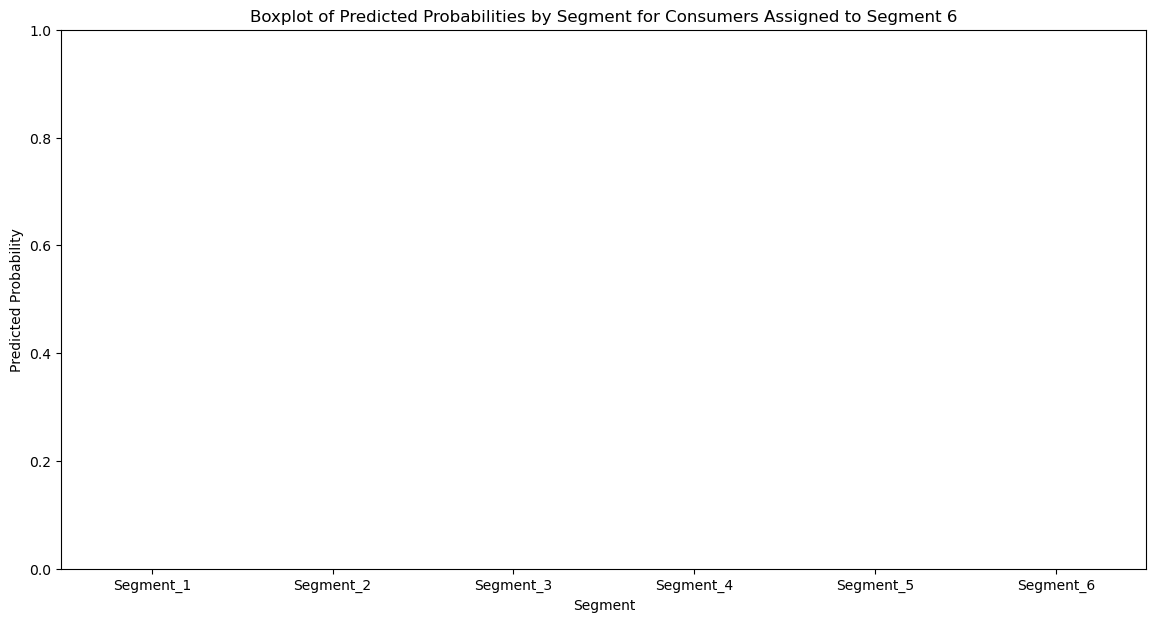

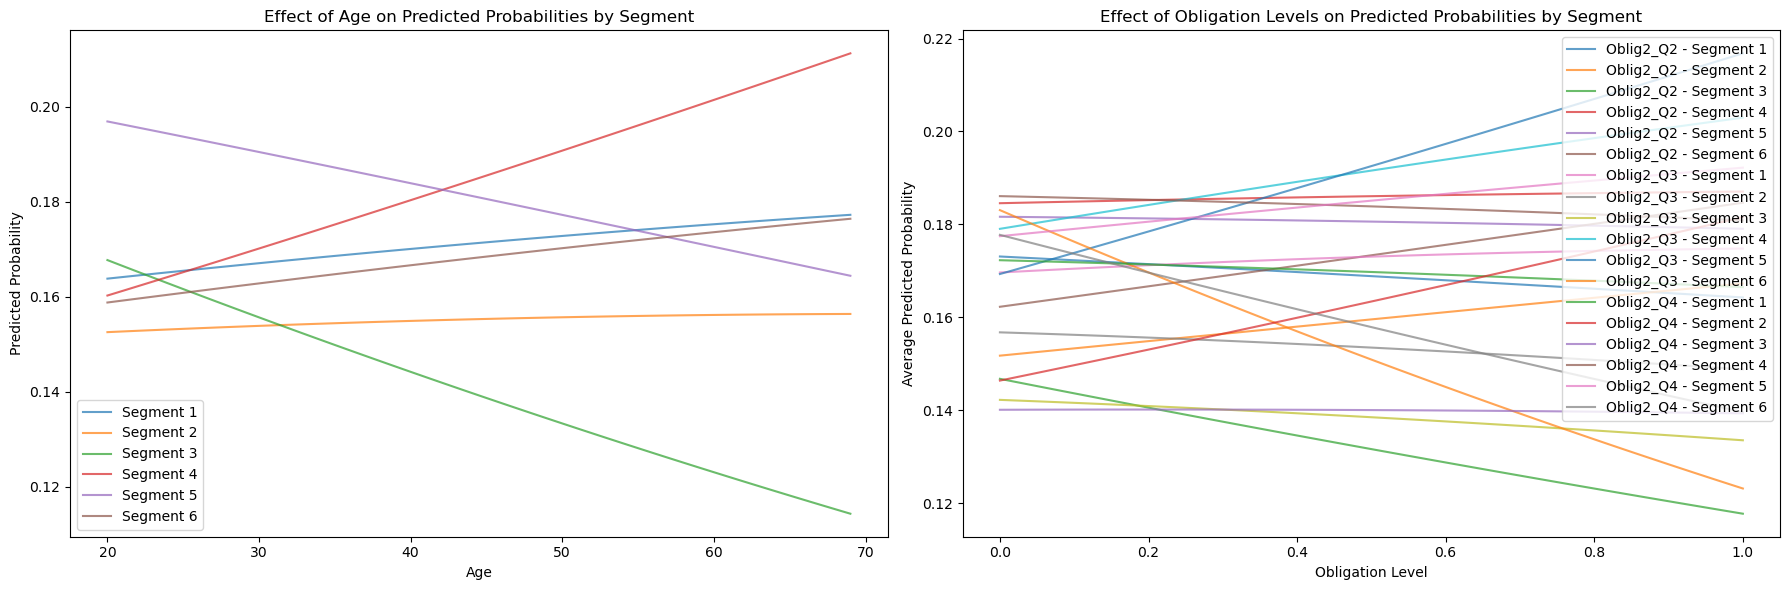

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Create synthetic dataset
vacmotdesc = pd.DataFrame({
    'C6': np.random.choice([1, 2, 3, 4, 5, 6], size=1000),
    'Age': np.random.randint(20, 70, size=1000),
    'Oblig2': np.random.choice(['Q1', 'Q2', 'Q3', 'Q4'], size=1000)
})

# Convert categorical variable to dummy/indicator variables
vacmotdesc = pd.get_dummies(vacmotdesc, columns=['Oblig2'], drop_first=True)

# Define the dependent and independent variables
X = vacmotdesc[['Age', 'Oblig2_Q2', 'Oblig2_Q3', 'Oblig2_Q4']]
y = vacmotdesc['C6']

# Convert boolean columns to integer
X = X.astype(int)

# Ensure all values are numeric
y = y.astype(int)

# Add constant for intercept
X = sm.add_constant(X)

# Fit multinomial logistic regression model
try:
    model = MNLogit(y, X)
    result = model.fit()
    print(result.summary())
except Exception as e:
    print("Error fitting the model:", e)

# Predict probabilities
pred_probs = result.predict(X)
predicted_class = pred_probs.idxmax(axis=1) + 1  # +1 because indices are 0-based

# Create a DataFrame for observed vs predicted
predicted_df = pd.DataFrame({'Observed': y, 'Predicted': predicted_class})

# Mosaic plot of observed vs predicted
plt.figure(figsize=(12, 6))
mosaic(predicted_df, ['Observed', 'Predicted'])
plt.title('Mosaic Plot of Observed vs Predicted Segment Membership')
plt.show()

# Create a DataFrame for predicted probabilities and observed classes
prob_df = pd.DataFrame(pred_probs, columns=[f'Segment_{i+1}' for i in range(pred_probs.shape[1])])
prob_df['Observed'] = y

# Filter rows where segment 6 is the observed class
segment_6_df = prob_df[prob_df['Observed'] == 6]

# Check how many data points are assigned to segment 6
print(f"Number of data points assigned to segment 6: {len(segment_6_df)}")
print(segment_6_df.describe())

# Boxplot of predicted probabilities by segment for consumers assigned to segment 6
plt.figure(figsize=(14, 7))
sns.boxplot(data=segment_6_df.drop('Observed', axis=1))
plt.title('Boxplot of Predicted Probabilities by Segment for Consumers Assigned to Segment 6')
plt.xlabel('Segment')
plt.ylabel('Predicted Probability')
plt.show()

# Effect visualization of age and moral obligation
# Prepare data for effect visualization
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Check if 'Age' column exists in X
if 'Age' in X.columns:
    # Age vs Predicted Probabilities for each segment
    age_range = np.linspace(X['Age'].min(), X['Age'].max(), 100)
    for segment in range(1, 7):
        probs_by_age = []
        for age in age_range:
            X_age = X.copy()
            X_age['Age'] = age
            probs_by_age.append(result.predict(X_age).mean(axis=0)[segment-1])
        axs[0].plot(age_range, probs_by_age, label=f'Segment {segment}', alpha=0.7)
    axs[0].set_xlabel('Age')
    axs[0].set_ylabel('Predicted Probability')
    axs[0].set_title('Effect of Age on Predicted Probabilities by Segment')
    axs[0].legend()
else:
    axs[0].text(0.5, 0.5, 'Column "Age" not found in X', horizontalalignment='center', verticalalignment='center')
    axs[0].set_title('Effect of Age on Predicted Probabilities by Segment')

# Obligation levels vs Predicted Probabilities for each segment
obligation_cols = [col for col in X.columns if col.startswith('Oblig2_')]
if obligation_cols:
    for i, col in enumerate(obligation_cols, start=1):
        obligation_range = np.linspace(0, 1, 100)
        probs_by_oblig = []
        for oblig in obligation_range:
            X_oblig = X.copy()
            X_oblig[col] = oblig
            probs_by_oblig.append(result.predict(X_oblig).mean(axis=0))
        probs_by_oblig = np.array(probs_by_oblig)
        for segment in range(1, 7):
            axs[1].plot(obligation_range, probs_by_oblig[:, segment-1], label=f'{col} - Segment {segment}', alpha=0.7)
    axs[1].set_xlabel('Obligation Level')
    axs[1].set_ylabel('Average Predicted Probability')
    axs[1].set_title('Effect of Obligation Levels on Predicted Probabilities by Segment')
    axs[1].legend()
else:
    axs[1].text(0.5, 0.5, 'No obligation columns found', horizontalalignment='center', verticalalignment='center')
    axs[1].setTitle('Effect of Obligation Levels on Predicted Probabilities by Segment')

plt.tight_layout()
plt.show()


Tree-Based Method

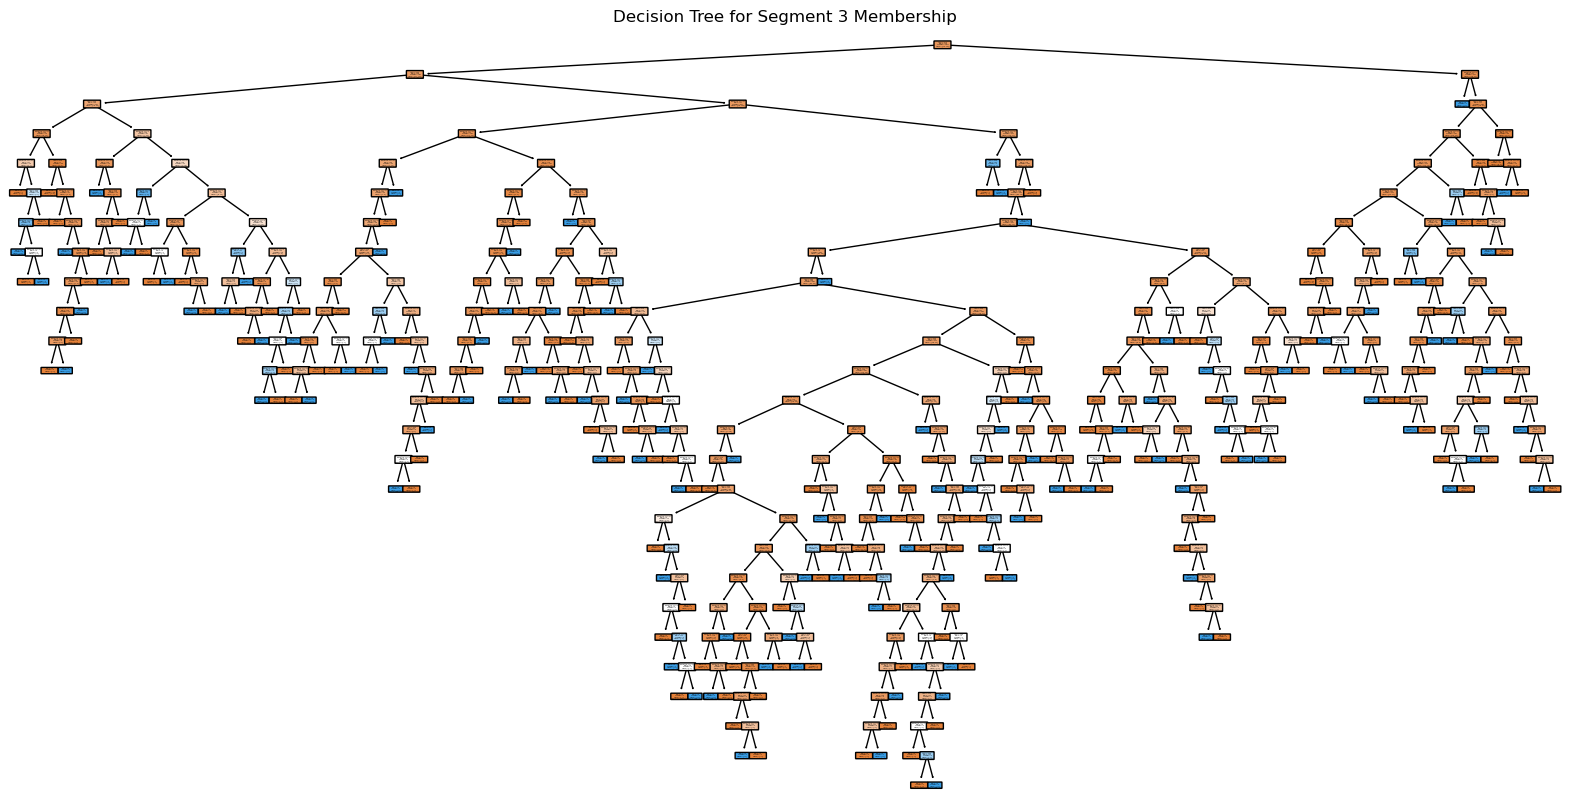

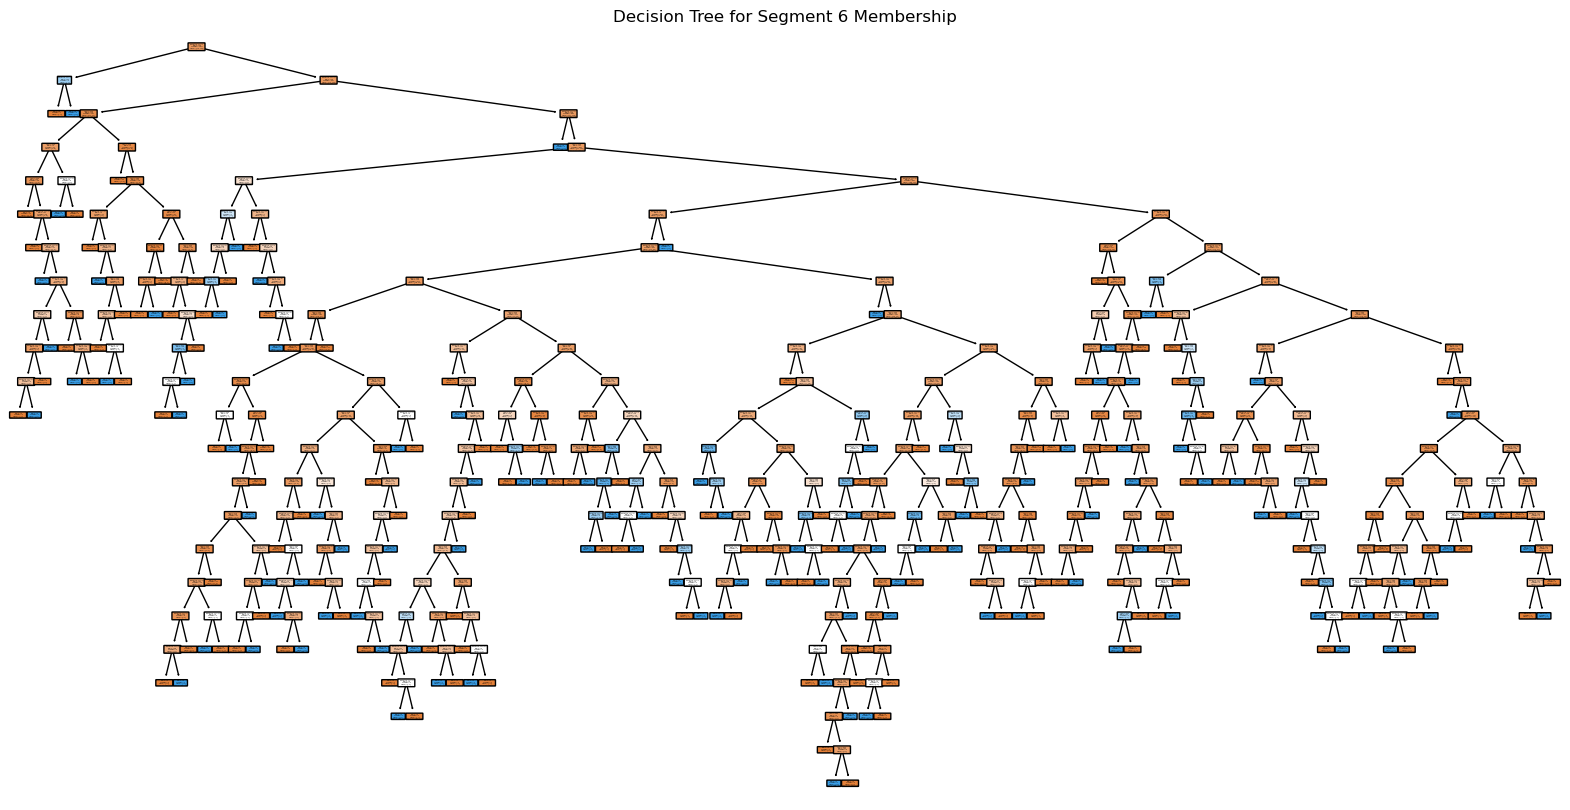

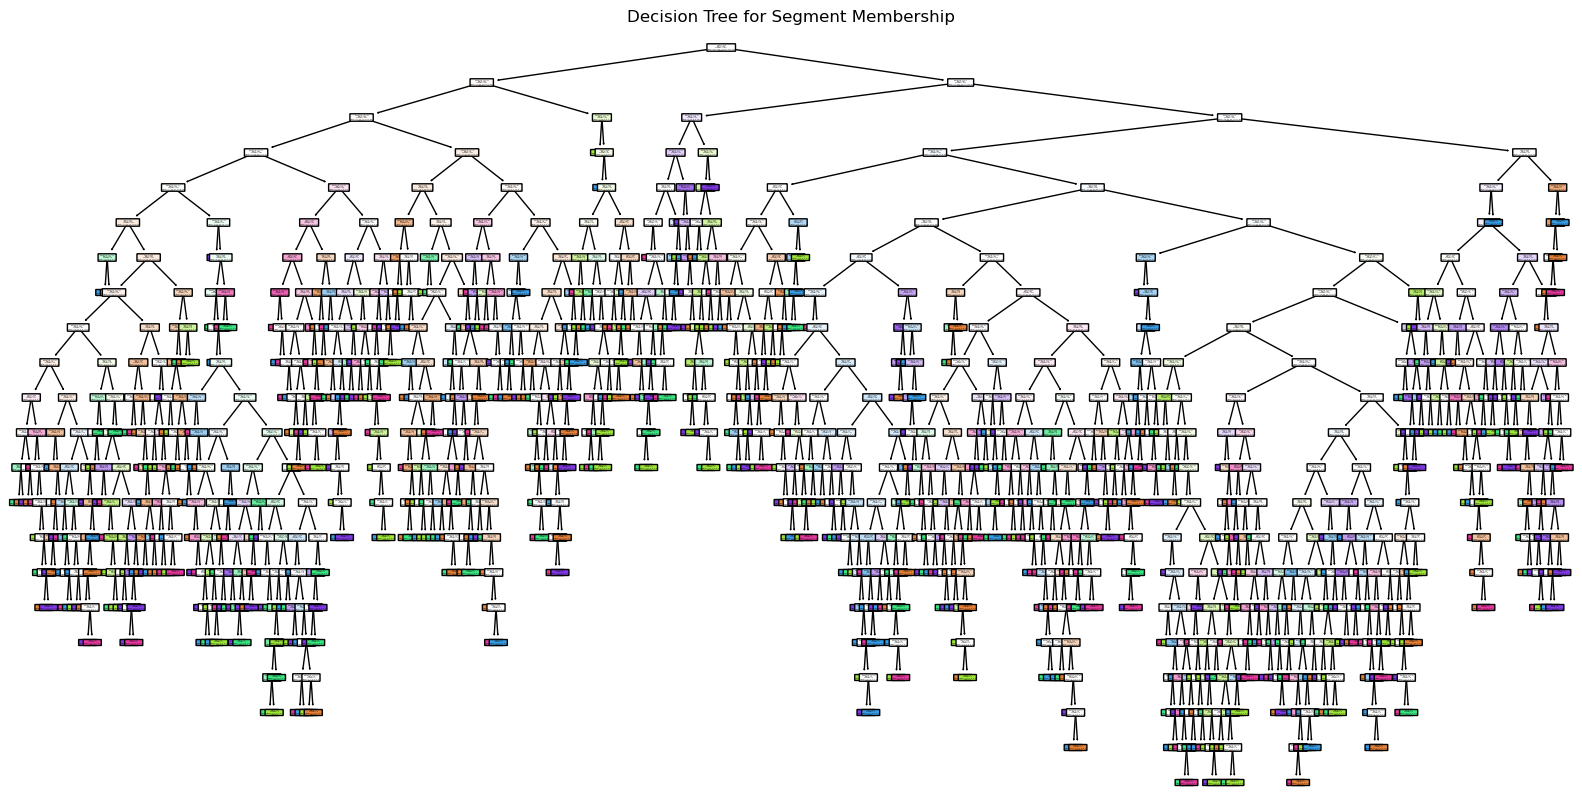

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data preparation
np.random.seed(42)
vacmotdesc = pd.DataFrame({
    'C6': np.random.choice([1, 2, 3, 4, 5, 6], size=1000),
    'Age': np.random.randint(20, 70, size=1000),
    'Obligation': np.random.rand(1000)
})

# Define the dependent and independent variables
X = vacmotdesc[['Age', 'Obligation']]

# 1. Conditional inference tree using membership in segment 3 as the dependent variable
y_segment_3 = (vacmotdesc['C6'] == 3).astype(int)
tree_segment_3 = DecisionTreeClassifier(random_state=42)
tree_segment_3.fit(X, y_segment_3)

plt.figure(figsize=(20, 10))
plot_tree(tree_segment_3, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True, rounded=True, precision=2)
plt.title('Decision Tree for Segment 3 Membership')
plt.xlabel('Features')
plt.ylabel('Decision Nodes')
plt.show()

# 2. Conditional inference tree using membership in segment 6 as the dependent variable
y_segment_6 = (vacmotdesc['C6'] == 6).astype(int)
tree_segment_6 = DecisionTreeClassifier(random_state=42)
tree_segment_6.fit(X, y_segment_6)

plt.figure(figsize=(20, 10))
plot_tree(tree_segment_6, feature_names=X.columns, class_names=['Not Segment 6', 'Segment 6'], filled=True, rounded=True, precision=2)
plt.title('Decision Tree for Segment 6 Membership')
plt.xlabel('Features')
plt.ylabel('Decision Nodes')
plt.show()

# 3. Conditional inference tree using segment membership as the dependent variable
y_segment_all = vacmotdesc['C6']
tree_segment_all = DecisionTreeClassifier(random_state=42)
tree_segment_all.fit(X, y_segment_all)

plt.figure(figsize=(20, 10))
plot_tree(tree_segment_all, feature_names=X.columns, class_names=[str(i) for i in sorted(y_segment_all.unique())], filled=True, rounded=True, precision=2)
plt.title('Decision Tree for Segment Membership')
plt.xlabel('Features')
plt.ylabel('Decision Nodes')
plt.show()


In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pandas as pd
import numpy as np

# Example data preparation
np.random.seed(42)
vacmotdesc = pd.DataFrame({
    'C6': np.random.choice([1, 2, 3, 4, 5, 6], size=1000),
    'Age': np.random.randint(20, 70, size=1000),
    'Obligation': np.random.rand(1000)
})

# Define the dependent and independent variables
X = vacmotdesc[['Age', 'Obligation']]

# 1. Conditional inference tree using membership in segment 3 as the dependent variable
y_segment_3 = (vacmotdesc['C6'] == 3).astype(int)
tree_segment_3 = DecisionTreeClassifier(random_state=42)
tree_segment_3.fit(X, y_segment_3)

# Plot the tree with Graphviz
dot_data_3 = export_graphviz(
    tree_segment_3, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=['Not Segment 3', 'Segment 3'], 
    filled=True, 
    rounded=True, 
    special_characters=True, 
    proportion=True, 
    precision=2
)
graph_3 = graphviz.Source(dot_data_3)
graph_3.render("tree_segment_3", format='png', cleanup=False)

# 2. Conditional inference tree using membership in segment 6 as the dependent variable
y_segment_6 = (vacmotdesc['C6'] == 6).astype(int)
tree_segment_6 = DecisionTreeClassifier(random_state=42)
tree_segment_6.fit(X, y_segment_6)

# Plot the tree with Graphviz
dot_data_6 = export_graphviz(
    tree_segment_6, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=['Not Segment 6', 'Segment 6'], 
    filled=True, 
    rounded=True, 
    special_characters=True, 
    proportion=True, 
    precision=2
)
graph_6 = graphviz.Source(dot_data_6)
graph_6.render("tree_segment_6", format='png', cleanup=False)

# 3. Conditional inference tree using segment membership as the dependent variable
y_segment_all = vacmotdesc['C6']
tree_segment_all = DecisionTreeClassifier(random_state=42)
tree_segment_all.fit(X, y_segment_all)

# Plot the tree with Graphviz
dot_data_all = export_graphviz(
    tree_segment_all, 
    out_file=None, 
    feature_names=X.columns, 
    class_names=[str(i) for i in sorted(y_segment_all.unique())], 
    filled=True, 
    rounded=True, 
    special_characters=True, 
    proportion=True, 
    precision=2
)
graph_all = graphviz.Source(dot_data_all)
graph_all.render("tree_segment_all", format='png', cleanup=False)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.412589 to fit


'tree_segment_all.png'